In [3]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

c:\Users\ASUS\.conda\envs\gymenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


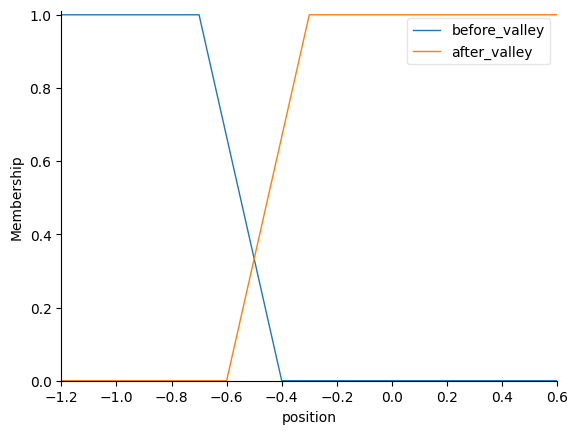

In [4]:
position = ctrl.Antecedent(np.arange(-1.2, 0.601, 0.001), 'position')

position['before_valley'] = fuzz.trapmf(position.universe, [-1.2, -1.2, -0.7, -0.4])
position['after_valley'] = fuzz.trapmf(position.universe, [-0.6, -0.3, 0.6, 0.6])

position.view()

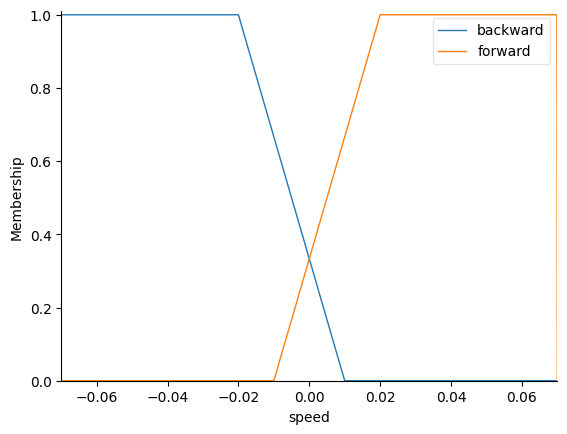

In [5]:
speed = ctrl.Antecedent(np.arange(-0.07, 0.0701, 0.0001), 'speed')

speed['backward'] = fuzz.trapmf(speed.universe, [-0.07, -0.07, -0.02, 0.01])
speed['forward'] = fuzz.trapmf(speed.universe, [-0.01, 0.02, 0.07, 0.07])

speed.view()

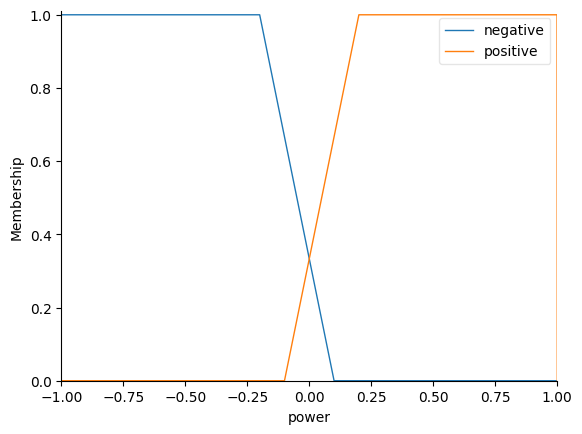

In [6]:
power = ctrl.Consequent(np.arange(-1, 1.001, 0.001), 'power')

power['negative'] = fuzz.trapmf(power.universe, [-1, -1, -0.2, 0.1])
power['positive'] = fuzz.trapmf(power.universe, [-0.1, 0.2, 1, 1])

power.view()

In [7]:
rule1 = ctrl.Rule(position['before_valley'] & speed['backward'], power['negative'])
rule2 = ctrl.Rule(position['before_valley'] & speed['forward'], power['positive'])
rule3 = ctrl.Rule(position['after_valley'] & speed['backward'], power['negative'])
rule4 = ctrl.Rule(position['after_valley'] & speed['forward'], power['positive'])

In [8]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(controller)

In [11]:
env = gym.make("MountainCarContinuous-v0", render_mode="human")

observation, _ = env.reset()
for _ in range(500):
    simulator.input['position'] = observation[0]
    simulator.input['speed'] = observation[1]
    simulator.compute()
    decision = simulator.output['power']

    observation, reward, terminated, truncated, info = env.step([decision])
    
    # Make it easier
    if observation[0] >= 0.3:
        terminated=True
    
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 196 iteration!
